# Fashion MNIST Classification
## Part 2 - Binary Classification of the dataset
Created by:
- Beatriz Correia Paulino 
- Luís Pereira
- João Fragoso 

Problem Formulation: 

In [7]:
# Necessary imports
import tensorflow as tf
from tensorflow.keras import layers
import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import random

Definitions:
- Image height and width which is 28 pixels.
- ModelCheckpoint: Saves the best model's weights based on the validation loss.
- EarlyStopping: Stops training if the validation loss does not improve for 5 consecutive epochs.

In [2]:
# constants - dimensions
IMG_HEIGHT = 28
IMG_WIDTH = 28

# callbacks
BEST_MODEL_CHECKPOINT= tf.keras.callbacks.ModelCheckpoint(
    filepath="tmp/best_model_binary.weights.h5",     
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

EARLY_STOPPING = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5)

In [3]:
# Load the Fashion MNIST dataset
dataset = tf.keras.datasets.fashion_mnist

# Split into training and testing data
(x_train_binary, y_train_binary), (x_test_binary, y_test_binary) = dataset.load_data()

In [4]:
# Split x_train/y_train into training and validation sets
x_train_binary, x_val_binary = x_train_binary[:50000], x_train_binary[50000:]
y_train_binary, y_val_binary = y_train_binary[:50000], y_train_binary[50000:]

### Function to convert the labels to binary:
- Labels 0, 1, 2, 3, 4, 6 are mapped to 1 (clothing).
- Labels 5, 7, 8, 9 are mapped to 0 (shoes and bags).
- This function is applied to the training, test, and validation labels.

In [5]:
# Mapping to binary

def map_to_binary(labels):
    # Positive class (1): labels 0, 1, 2, 3, 4, 6 - Clothing
    # Negative class (0): the rest (5, 7, 8, 9) - Shoes and Bags
    binary_labels = np.where((labels <= 4) | (labels == 6), 1, 0)
    return binary_labels

# Apply the mapping function to the datasets
y_train_binary = map_to_binary(y_train_binary)
y_test_binary = map_to_binary(y_test_binary)
y_val_binary = map_to_binary(y_val_binary)

In [6]:
# Normalization
x_train_binary = x_train_binary.astype('float32') / 255.0
x_test_binary = x_test_binary.astype('float32') / 255.0
x_val_binary = x_val_binary.astype('float32') / 255.0

### Model definition, training and compiler

In [9]:
# Set Seed for Reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Create the model for binary classification
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_binary, y_train_binary, epochs=25, validation_data=(x_val_binary, y_val_binary), callbacks=[BEST_MODEL_CHECKPOINT, EARLY_STOPPING])

# Calculating the accuracy on the test set and val set for all models and keeping the best one
test_loss, test_accuracy = model.evaluate(x_test_binary, y_test_binary, verbose=2)
val_loss, val_accuracy = model.evaluate(x_val_binary, y_val_binary, verbose=2)

print(f"Test accuracy: {test_accuracy}")
print(f"Val accuracy: {val_accuracy}")

Epoch 1/25
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9861 - val_loss: 0.0308 - val_accuracy: 0.9917
Epoch 2/25
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.0251 - val_accuracy: 0.9933
Epoch 3/25
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0267 - accuracy: 0.9929 - val_loss: 0.0237 - val_accuracy: 0.9933
Epoch 4/25
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0251 - accuracy: 0.9931 - val_loss: 0.0209 - val_accuracy: 0.9939
Epoch 5/25
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0212 - val_accuracy: 0.9927
Epoch 6/25
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.0198 - val_accuracy: 0.9942
Epoch 7/25
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0201 - val_accuracy:

## Model Evaluation

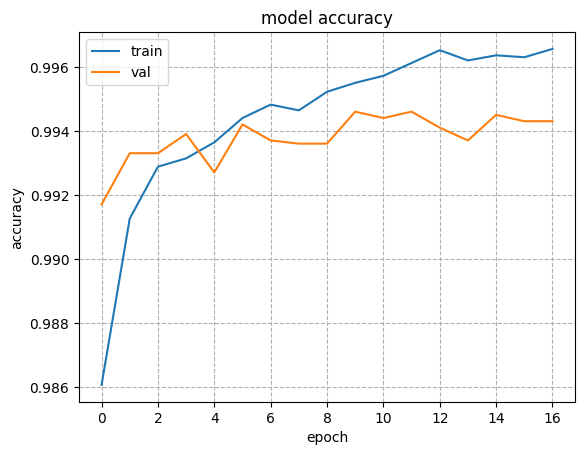

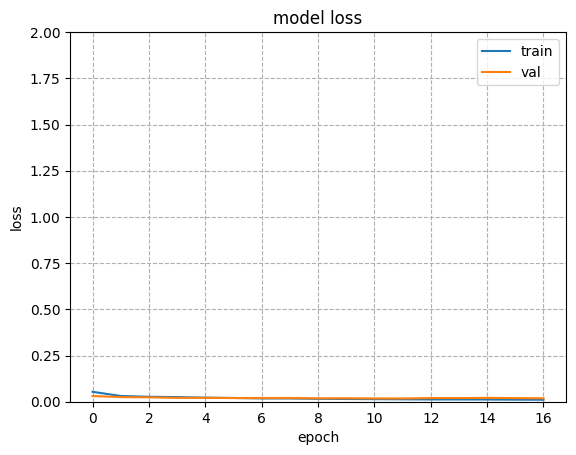

In [10]:
# Evaluate the model - loss and accuracy during training

# accuracy
plt.figure(num=1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.grid(True, ls='--')


# loss
plt.figure(num=2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylim(0, 2.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper right")
plt.grid(True, ls='--')

In [11]:
# Accuracy on test set
test_loss, test_accuracy = model.evaluate(x_test_binary, y_test_binary, verbose=2)
print(f"Test accuracy: {test_accuracy}")

313/313 - 0s - loss: 0.0190 - accuracy: 0.9944 - 454ms/epoch - 1ms/step
Test accuracy: 0.9944000244140625


In [12]:
# Generating predictions for the confusion matrix
y_pred = model.predict(x_test_binary)
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

313/313 [==============================] - 0s 1ms/step


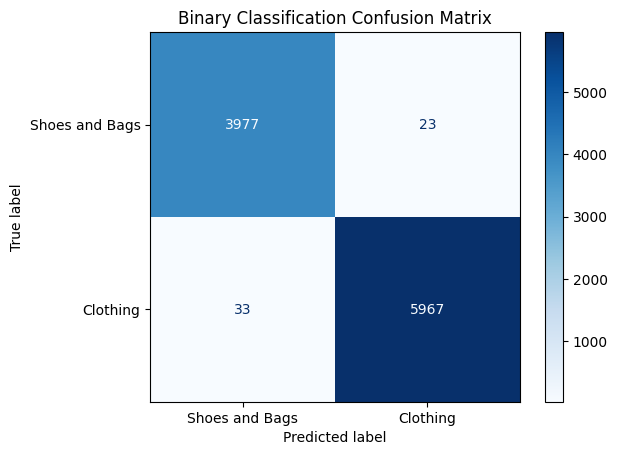

In [13]:
# Displaying the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Shoes and Bags', 'Clothing'])
disp.plot(cmap=plt.cm.Blues)
disp.ax_.set_title("Binary Classification Confusion Matrix")
plt.show()

The binary classification network confuses the two classes, with more errors occurring when classifying Clothing as Shoes and Bags.